In [1]:
# Import dependencies
import numpy as np 
import numpy_financial as npf
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
from sklearn import datasets
from scipy.stats import linregress

In [2]:
# Import and clean the datasets
used_cars = pd.read_csv('Resources/Cleaned_Data.csv')
used_cars = pd.DataFrame(used_cars)
used_cars = used_cars.sort_values('Year')
used_cars = used_cars.loc[used_cars['Year'] >= 2009]
used_cars = used_cars.drop(columns = ['Unnamed: 0', 'Mileage', 'Vin'])
used_cars

,Price,Year,City,State,Make,Model
392903,9990,2009,Republic,MO,Honda,Accord
653268,5400,2009,Winston-Salem,NC,Nissan,Sentra4dr
362475,17500,2009,TULSA,OK,GMC,Yukon4WD
236724,29995,2009,Houston,TX,Dodge,Ram
658645,6995,2009,North Lauderdale,FL,Nissan,Versa5dr
...,...,...,...,...,...,...
428983,42900,2018,Fayetteville,NC,Honda,OdysseyTouring
610430,38990,2018,PEORIA,IL,Mercedes-Benz,CLACLA
428374,46090,2018,Fairfax,VA,Honda,OdysseyElite
428985,41998,2018,Winter Haven,FL,Honda,OdysseyTouring


In [3]:
inflation_table = pd.DataFrame({'Inflation Rate':[17.0, 15.2, 11.6, 9.4, 7.8, 6.1, 5.9, 4.6, 2.4]})
inflation_table = (inflation_table/100) + 1
# Stack Overflow helped me add a row
inflation_table.loc[9] = [1]  # adding a row
inflation_table['Year'] = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
inflation_table

,Inflation Rate,Year
0,1.170,2009
1,1.152,2010
2,1.116,2011
3,1.094,2012
4,1.078,2013
5,1.061,2014
6,1.059,2015
7,1.046,2016
8,1.024,2017
9,1.000,2018


In [4]:
used_cars_inflation = used_cars.merge(inflation_table, on = 'Year', how = 'outer')
used_cars_inflation
used_cars_inflation['Inflation Price'] = used_cars_inflation['Price'] * used_cars_inflation['Inflation Rate']
used_cars_inflation

,Price,Year,City,State,Make,Model,Inflation Rate,Inflation Price
0,9990,2009,Republic,MO,Honda,Accord,1.17,11688.30
1,5400,2009,Winston-Salem,NC,Nissan,Sentra4dr,1.17,6318.00
2,17500,2009,TULSA,OK,GMC,Yukon4WD,1.17,20475.00
3,29995,2009,Houston,TX,Dodge,Ram,1.17,35094.15
4,6995,2009,North Lauderdale,FL,Nissan,Versa5dr,1.17,8184.15
...,...,...,...,...,...,...,...,...
755350,42900,2018,Fayetteville,NC,Honda,OdysseyTouring,1.00,42900.00
755351,38990,2018,PEORIA,IL,Mercedes-Benz,CLACLA,1.00,38990.00
755352,46090,2018,Fairfax,VA,Honda,OdysseyElite,1.00,46090.00
755353,41998,2018,Winter Haven,FL,Honda,OdysseyTouring,1.00,41998.00


In [5]:
avg_fin_rate = pd.read_csv('Resources/used_avg_finrate.csv')
avg_fin_rate = pd.DataFrame(avg_fin_rate)
avg_fin_rate

,DATE,RIELPCFAUNQ
0,2008-01-01,12.08
1,2008-04-01,10.63
2,2008-07-01,10.62
3,2008-10-01,10.33
4,2009-01-01,10.37
...,...,...
58,2022-07-01,14.38
59,2022-10-01,14.78
60,2023-01-01,15.70
61,2023-04-01,16.02


In [6]:
fin_rate = avg_fin_rate.rename(columns = {'RIELPCFAUNQ': 'Interest Rate'})
fin_rate.head()

,DATE,Interest Rate
0,2008-01-01,12.08
1,2008-04-01,10.63
2,2008-07-01,10.62
3,2008-10-01,10.33
4,2009-01-01,10.37


In [7]:
# Xpert Learning Assistant helped me figure out the str.split() method.
fin_rate[['Year', 'Month', 'Day']] = fin_rate['DATE'].str.split('-', expand = True)
fin_rate

,DATE,Interest Rate,Year,Month,Day
0,2008-01-01,12.08,2008,01,01
1,2008-04-01,10.63,2008,04,01
2,2008-07-01,10.62,2008,07,01
3,2008-10-01,10.33,2008,10,01
4,2009-01-01,10.37,2009,01,01
...,...,...,...,...,...
58,2022-07-01,14.38,2022,07,01
59,2022-10-01,14.78,2022,10,01
60,2023-01-01,15.70,2023,01,01
61,2023-04-01,16.02,2023,04,01


In [8]:
rate_year = fin_rate.groupby('Year').mean('Interest Rate')
rate_year = rate_year.loc['2009':'2018']
rate_year = rate_year.round(2)
rate_year.index = rate_year.index.astype('int')
rate_year

,Interest Rate
Year,
2009,10.39
2010,10.89
2011,11.52
2012,12.42
2013,12.92
2014,13.33
2015,14.16
2016,13.51
2017,13.47


In [9]:
fin_amount = pd.read_csv('Resources/used_avg_finamount.csv')
fin_amount = pd.DataFrame(fin_amount)
fin_amount.head()

,DATE,DTCTLVEUANQ
0,2008-01-01,17062.62
1,2008-04-01,17095.87
2,2008-07-01,16963.08
3,2008-10-01,16947.01
4,2009-01-01,15980.77


In [10]:
fin_amount = fin_amount.rename(columns = {'DTCTLVEUANQ': 'Loan Amount'})
fin_amount[['Year', 'Month', 'Day']] = fin_amount['DATE'].str.split('-', expand = True)
fin_amount.head()

,DATE,Loan Amount,Year,Month,Day
0,2008-01-01,17062.62,2008,01,01
1,2008-04-01,17095.87,2008,04,01
2,2008-07-01,16963.08,2008,07,01
3,2008-10-01,16947.01,2008,10,01
4,2009-01-01,15980.77,2009,01,01


In [11]:
amount_year = fin_amount.groupby('Year').mean('Loan Amount')
amount_year = amount_year.loc['2009':'2018']
amount_year = amount_year.round(2)
amount_year = amount_year.reset_index()
amount_year['Year'] = amount_year['Year'].astype(int)
amount_year

,Year,Loan Amount
0,2009,16528.52
1,2010,17069.19
2,2011,17090.76
3,2012,16902.16
4,2013,17100.69
5,2014,17263.06
6,2015,16977.38
7,2016,17044.96
8,2017,17259.54
9,2018,17875.90


In [12]:
amount_inflation = amount_year.merge(inflation_table, on = 'Year', how = 'outer')
amount_inflation['Inflation Loan Amount'] = (amount_inflation['Loan Amount'] * amount_inflation['Inflation Rate']).round(2)
amount_inflation = amount_inflation.set_index('Year')
amount_inflation

,Loan Amount,Inflation Rate,Inflation Loan Amount
Year,,,
2009,16528.52,1.170,19338.37
2010,17069.19,1.152,19663.71
2011,17090.76,1.116,19073.29
2012,16902.16,1.094,18490.96
2013,17100.69,1.078,18434.54
2014,17263.06,1.061,18316.11
2015,16977.38,1.059,17979.05
2016,17044.96,1.046,17829.03
2017,17259.54,1.024,17673.77


In [13]:
maturity = pd.read_csv('Resources/used_avg_mat.csv')
maturity = pd.DataFrame(maturity)
maturity.tail()

,DATE,DTCTLVEUMNQ
58,2022-07-01,66.19
59,2022-10-01,66.27
60,2023-01-01,65.76
61,2023-04-01,65.72
62,2023-07-01,66.38


In [14]:
maturity = maturity.rename(columns = {'DTCTLVEUMNQ': 'Months'})
maturity[['Year', 'Month', 'Day']] = maturity['DATE'].str.split('-', expand = True)
maturity_year = maturity.groupby('Year').mean('Months')/12
maturity_year = maturity_year.rename(columns = {'Months':'Loan Years'})
maturity_year = maturity_year.loc['2009':'2018']
maturity_year = maturity_year.round(2)
maturity_year.index = maturity_year.index.astype(int)
maturity_year

,Loan Years
Year,
2009,4.62
2010,4.71
2011,4.71
2012,4.74
2013,4.91
2014,4.93
2015,5.04
2016,5.08
2017,5.10


In [15]:
merge_interest = [rate_year, amount_inflation['Inflation Loan Amount'], maturity_year]
interest_df = pd.concat(merge_interest, axis = 1, join = 'outer')
interest_df

,Interest Rate,Inflation Loan Amount,Loan Years
Year,,,
2009,10.39,19338.37,4.62
2010,10.89,19663.71,4.71
2011,11.52,19073.29,4.71
2012,12.42,18490.96,4.74
2013,12.92,18434.54,4.91
2014,13.33,18316.11,4.93
2015,14.16,17979.05,5.04
2016,13.51,17829.03,5.08
2017,13.47,17673.77,5.10


In [16]:
used_prices_year = used_cars_inflation.groupby('Year').mean('Inflation Price')
used_prices_year = used_prices_year.round(2)
used_prices_year = used_prices_year[['Inflation Price']]
used_prices_year

,Inflation Price
Year,
2009,15266.68
2010,16419.98
2011,18201.91
2012,19040.57
2013,20733.09
2014,23498.78
2015,26500.75
2016,26607.78
2017,30519.32


In [17]:
used_prices_merge = interest_df.merge(used_prices_year, how = 'left', on = 'Year')
used_prices_merge

,Interest Rate,Inflation Loan Amount,Loan Years,Inflation Price
Year,,,,
2009,10.39,19338.37,4.62,15266.68
2010,10.89,19663.71,4.71,16419.98
2011,11.52,19073.29,4.71,18201.91
2012,12.42,18490.96,4.74,19040.57
2013,12.92,18434.54,4.91,20733.09
2014,13.33,18316.11,4.93,23498.78
2015,14.16,17979.05,5.04,26500.75
2016,13.51,17829.03,5.08,26607.78
2017,13.47,17673.77,5.10,30519.32


In [18]:
# A search for calculating a loan payment formula using pandas led me to the numpy-financial pacakage and the pmt function.
interest_df['Monthly Payment'] = npf.pmt((interest_df['Interest Rate']/100)/12, (interest_df['Loan Years'])*12, interest_df['Inflation Loan Amount']).round(2)
interest_df['Monthly Interest'] = (interest_df['Inflation Loan Amount']) * (interest_df['Interest Rate']/100) * (interest_df['Loan Years'])
interest_df['Monthly Interest'] = interest_df['Monthly Interest'].round(2)
interest_df['Total Payment'] = interest_df['Inflation Loan Amount'] + interest_df['Monthly Interest']
interest_df

,Interest Rate,Inflation Loan Amount,Loan Years,Monthly Payment,Monthly Interest,Total Payment
Year,,,,,,
2009,10.39,19338.37,4.62,-440.69,9282.77,28621.14
2010,10.89,19663.71,4.71,-446.27,10085.89,29749.60
2011,11.52,19073.29,4.71,-438.83,10349.01,29422.30
2012,12.42,18490.96,4.74,-431.75,10885.78,29376.74
2013,12.92,18434.54,4.91,-424.16,11694.36,30128.90
2014,13.33,18316.11,4.93,-424.05,12036.78,30352.89
2015,14.16,17979.05,5.04,-417.54,12831.00,30810.05
2016,13.51,17829.03,5.08,-405.80,12236.21,30065.24
2017,13.47,17673.77,5.10,-400.81,12141.35,29815.12


In [19]:
yearly_total_payment = interest_df.drop(columns=['Inflation Loan Amount', 'Monthly Payment', 'Monthly Interest'])
yearly_total_payment = yearly_total_payment.rename(columns = {'Total Payment':'Avg. Yearly Total Payment'})
yearly_total_payment

,Interest Rate,Loan Years,Avg. Yearly Total Payment
Year,,,
2009,10.39,4.62,28621.14
2010,10.89,4.71,29749.60
2011,11.52,4.71,29422.30
2012,12.42,4.74,29376.74
2013,12.92,4.91,30128.90
2014,13.33,4.93,30352.89
2015,14.16,5.04,30810.05
2016,13.51,5.08,30065.24
2017,13.47,5.10,29815.12


In [20]:
used_prices_make = used_cars_inflation.groupby(['Year', 'Make']).mean('Inflation Price')
used_prices_make = used_prices_make.round(2)
used_prices_make.reset_index(inplace = True)
used_prices_make = used_prices_make.drop(columns = ['Price', 'Inflation Rate'])
used_prices_make

,Year,Make,Inflation Price
0,2009,Acura,14930.34
1,2009,Aston,82860.68
2,2009,Audi,18978.87
3,2009,BMW,16697.17
4,2009,Bentley,83659.02
...,...,...,...
408,2018,Porsche,119461.00
409,2018,Subaru,28596.50
410,2018,Toyota,24331.65
411,2018,Volkswagen,37679.53


In [21]:
used_prices_make_price = pd.merge(yearly_total_payment, used_prices_make, on = 'Year', how = 'outer')
used_prices_make_price

,Year,Interest Rate,Loan Years,Avg. Yearly Total Payment,Make,Inflation Price
0,2009,10.39,4.62,28621.14,Acura,14930.34
1,2009,10.39,4.62,28621.14,Aston,82860.68
2,2009,10.39,4.62,28621.14,Audi,18978.87
3,2009,10.39,4.62,28621.14,BMW,16697.17
4,2009,10.39,4.62,28621.14,Bentley,83659.02
...,...,...,...,...,...,...
408,2018,14.14,5.14,30868.03,Porsche,119461.00
409,2018,14.14,5.14,30868.03,Subaru,28596.50
410,2018,14.14,5.14,30868.03,Toyota,24331.65
411,2018,14.14,5.14,30868.03,Volkswagen,37679.53


In [22]:
used_below_avg = used_prices_make_price.loc[used_prices_make_price['Inflation Price'] <= used_prices_make_price['Avg. Yearly Total Payment']]
used_below_avg

,Year,Interest Rate,Loan Years,Avg. Yearly Total Payment,Make,Inflation Price
0,2009,10.39,4.62,28621.14,Acura,14930.34
2,2009,10.39,4.62,28621.14,Audi,18978.87
3,2009,10.39,4.62,28621.14,BMW,16697.17
5,2009,10.39,4.62,28621.14,Buick,12556.21
6,2009,10.39,4.62,28621.14,Cadillac,17993.38
...,...,...,...,...,...,...
387,2017,13.47,5.10,29815.12,smart,18725.25
399,2018,14.14,5.14,30868.03,Hyundai,23682.60
403,2018,14.14,5.14,30868.03,Kia,29162.89
409,2018,14.14,5.14,30868.03,Subaru,28596.50


In [23]:
below_avg_counts = used_below_avg.groupby('Year').count()
below_avg_counts = below_avg_counts[['Interest Rate']].rename(columns={'Interest Rate':'Count'})
below_avg_counts

,Count
Year,
2009,36
2010,36
2011,34
2012,32
2013,30
2014,27
2015,22
2016,19
2017,17


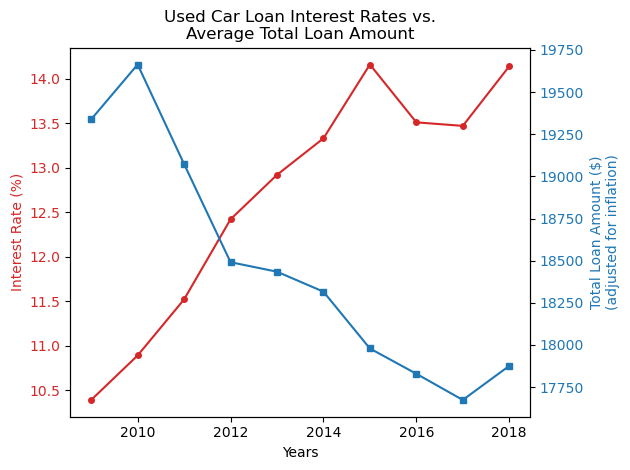

In [24]:
fig, ax1 = plt.subplots()

x = used_prices_merge.index
y = used_prices_merge['Interest Rate']

color = 'tab:red'
ax1.set_xlabel('Years')
ax1.set_ylabel('Interest Rate (%)', color=color)
ax1.plot(x, y, color=color, marker="o", markersize = 4)
ax1.tick_params(axis='y', labelcolor=color)

y2 = interest_df['Inflation Loan Amount']
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Total Loan Amount ($)' '\n' '(adjusted for inflation)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color, marker = 's', markersize = 4)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Used Car Loan Interest Rates vs.' '\n' 'Average Total Loan Amount')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Output/Interest_vs_Amounts.png")
plt.show()

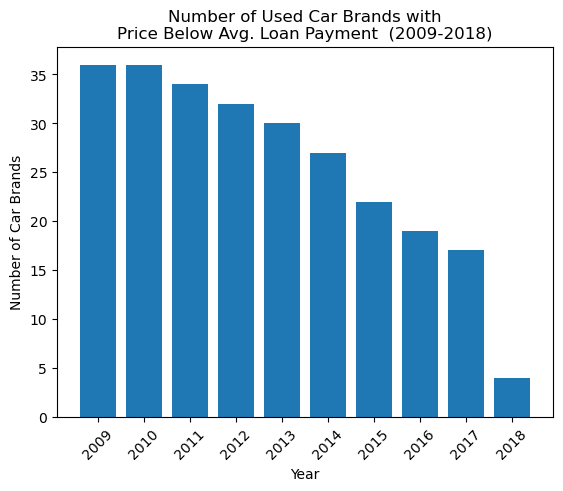

In [26]:
xbar = below_avg_counts.index
ybar = below_avg_counts['Count']
xticks = np.arange(len(xbar))

plt.bar(xticks, ybar)
plt.xticks(xticks, xbar, rotation = 45)

plt.title('Number of Used Car Brands with' '\n' 'Price Below Avg. Loan Payment  (2009-2018)')
plt.xlabel('Year')
plt.ylabel('Number of Car Brands')
plt.savefig("Output/Brands_Below_Average.png")
plt.show()